In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from agots.multivariate_generators.multivariate_data_generator import MultivariateDataGenerator

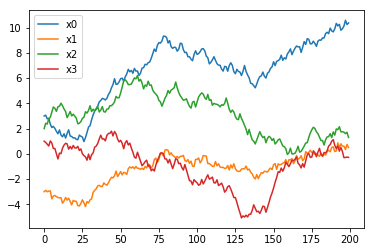

,x0,x1,x2,x3
x0,1.000000,0.985941,-0.144821,-0.186724
x1,0.985941,1.000000,-0.129324,-0.187107
x2,-0.144821,-0.129324,1.000000,0.197286
x3,-0.186724,-0.187107,0.197286,1.000000


In [4]:
np.random.seed(1337)

STREAM_LENGTH = 200
N = 4
K = 2

dg = MultivariateDataGenerator(STREAM_LENGTH, N, K)
df = dg.generate_baseline(initial_value_min=-4, initial_value_max=4)

for col in df.columns:
    plt.plot(df[col], label=col)
plt.legend()
plt.show()

df.corr()

### wucun_TN

In [5]:
#df = df.add_outliers({'extreme': [{'n': 0, 'timestamps': [(50,), (190,)]}],
#                      'shift':   [{'n': 1, 'timestamps': [(100,190)]}],
#                      'trend':   [{'n': 2, 'timestamps': [(20, 150)]}],
#                      'variance':[{'n': 3, 'timestamps': [(50, 100)]}]})

STREAM_LENGTH = 200
N = 4
K = 2

dg = MultivariateDataGenerator(STREAM_LENGTH, N, K)
df = dg.init_dataframe(number_time_series)

df = df.add_outliers({'extreme': [{'n': 0, 'timestamps': [(50,), (190,)]}]})
df.plot(figsize=(18,8))

AttributeError: 'DataFrame' object has no attribute 'add_outliers'

              x0
timestamp       
0          0.306
1          0.309
2          0.315
3          0.274
4          0.310
6510
[1224 3026  963 ... 5760  554 2671]


<AxesSubplot:xlabel='timestamp'>

<Figure size 720x360 with 0 Axes>

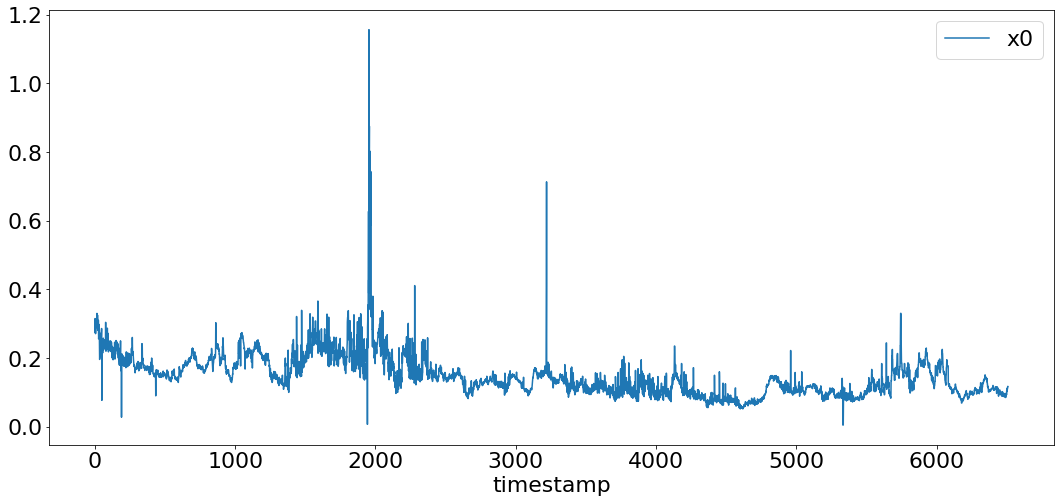

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import os
import matplotlib
import sys
sys.path.append('..')

from agots.multivariate_generators.multivariate_data_generator import MultivariateDataGenerator

matplotlib.rcParams.update({'font.size': 22})
plt.figure(figsize=(10,5))

STREAM_LENGTH = 200
N = 1
K = 1

raw_df = pd.read_csv("../csv/wucun_TP.csv", encoding='utf-8', header=0)
STREAM_LENGTH = len(raw_df)
raw_df = raw_df['TP']

dg = MultivariateDataGenerator(STREAM_LENGTH, N, K)
df = dg.create_time_series_from_data(raw_df)
print(df.head(5))
print(len(df))

# abnormal
abnormal_rate = 0.2

abnormal_events = np.random.randint(len(df), size=int(abnormal_rate * len(df)))

print(abnormal_events)

df = dg.add_outliers({'extreme': [{'n': 0, 'timestamps': [(50,), (190,)]}]})
df.plot(figsize=(18,8))




<AxesSubplot:>

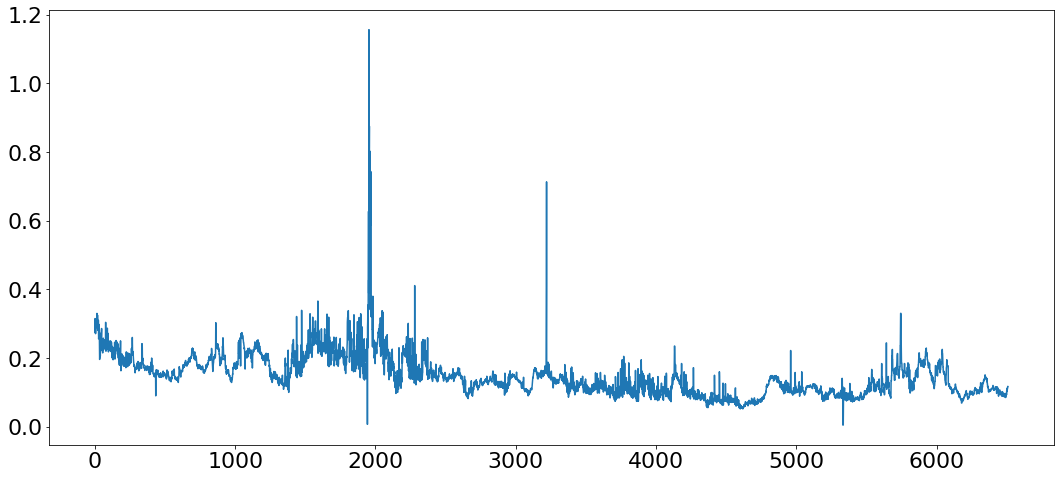

In [15]:
df = pd.read_csv('../csv/wucun_TP.csv', encoding = "utf-8")
df['datetime'] = pd.to_datetime(df['datetime'])
df = df['TP']

df.plot(figsize=(18,8))